# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_boston, load_wine, load_iris 
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [4]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [5]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [6]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0025139808654785155(+/- 0.0010545182826187229)
avg score time: 0.003629112243652344(+/- 0.0005318068136025282)
avg test time: 0.96(+/- 0.024944382578492935)


In [7]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.019320583343505858(+/- 0.00191534288462227)
avg score time: 0.0076373577117919925(+/- 0.0005808929722143782)
avg test time: 0.9533333333333334(+/- 0.02666666666666666)


##### 와인 데이터

In [8]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [9]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.00175018310546875(+/- 0.0007945606890368377)
avg score time: 0.0026844024658203127(+/- 0.0007599802653820911)
avg test time: 0.9493650793650794(+/- 0.037910929811115976)


In [10]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.024196767807006837(+/- 0.006216340419210097)
avg score time: 0.00797276496887207(+/- 0.0006248231913398447)
avg test time: 0.9493650793650794(+/- 0.021392680112801845)


##### 유방암 데이터

In [11]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [12]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002021646499633789(+/- 7.114813079892364e-05)
avg score time: 0.0069921016693115234(+/- 0.00012402469403111917)
avg test time: 0.9648501785437045(+/- 0.009609970350036127)


In [13]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.022633695602416994(+/- 0.0014537279519816239)
avg score time: 0.017365503311157226(+/- 0.0014030366584718657)
avg test time: 0.9613414066138798(+/- 0.008922121107402356)


#### SVC

##### 붓꽃 데이터

In [14]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [15]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001634359359741211(+/- 0.0003925445010729528)
avg score time: 0.0004864215850830078(+/- 1.744754915827483e-05)
avg test time: 0.9666666666666666(+/- 0.02108185106778919)


In [16]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.028290224075317384(+/- 0.002956032836735764)
avg score time: 0.003152132034301758(+/- 0.00023852932265365924)
avg test time: 0.9533333333333334(+/- 0.03399346342395189)


##### 와인 데이터

In [17]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [18]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0028108596801757813(+/- 0.0006556467680354988)
avg score time: 0.0008241653442382813(+/- 0.00020919598817381525)
avg test time: 0.9833333333333334(+/- 0.022222222222222233)


In [19]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.035126256942749026(+/- 0.006694305820905679)
avg score time: 0.003780841827392578(+/- 0.00031088733216574536)
avg test time: 0.9722222222222221(+/- 0.03513641844631534)


##### 유방암 데이터

In [20]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [21]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006080341339111328(+/- 0.0005349244677969392)
avg score time: 0.001400899887084961(+/- 7.759056377224743e-05)
avg test time: 0.9736376339077782(+/- 0.014678541667933545)


In [22]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04398279190063477(+/- 0.004333158827471498)
avg score time: 0.00819988250732422(+/- 0.001667146870432181)
avg test time: 0.9648657040832169(+/- 0.01566592330434181)


#### Decision Tree

##### 붓꽃 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [24]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0016077041625976562(+/- 0.0006481458497293105)
avg score time: 0.0006201267242431641(+/- 0.0002796953783171472)
avg test time: 0.9533333333333334(+/- 0.03399346342395189)


In [25]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02629570960998535(+/- 0.003530895071168249)
avg score time: 0.0028755664825439453(+/- 0.000752620396483141)
avg test time: 0.9333333333333332(+/- 0.04714045207910316)


##### 와인 데이터

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [27]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0029807090759277344(+/- 0.001299787457870595)
avg score time: 0.0006616592407226562(+/- 0.000203962399848407)
avg test time: 0.8765079365079365(+/- 0.03321445165041705)


In [28]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03025956153869629(+/- 0.0038551756484241713)
avg score time: 0.002700614929199219(+/- 0.0005540473395156321)
avg test time: 0.9388888888888889(+/- 0.05665577237325316)


##### 유방암 데이터

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [30]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.009274053573608398(+/- 0.0007723492264891319)
avg score time: 0.0007077217102050781(+/- 3.790978363730159e-05)
avg test time: 0.9226517621487347(+/- 0.015202872755248578)


In [31]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.044137430191040036(+/- 0.008886290611466735)
avg score time: 0.002634096145629883(+/- 2.709274430567822e-05)
avg test time: 0.9473218444340942(+/- 0.018333657274991554)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [32]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [33]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [34]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0016971111297607421(+/- 0.0005177063079639293)
avg score time: 0.002309417724609375(+/- 0.0009093879146173256)
avg test time: 0.47357748833823543(+/- 0.13243123464477455)


In [35]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.021973085403442384(+/- 0.002287580544818424)
avg score time: 0.010737228393554687(+/- 0.0006340269608848121)
avg test time: 0.4902857301812979(+/- 0.15568608593352343)


##### 당뇨병 데이터

In [36]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [37]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0018561840057373046(+/- 0.0002785274618730202)
avg score time: 0.002890205383300781(+/- 0.0006925121102608594)
avg test time: 0.3689720650295623(+/- 0.044659049060165365)


In [38]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.025190162658691406(+/- 0.005687698694682215)
avg score time: 0.011110544204711914(+/- 0.001655035648162394)
avg test time: 0.41342822741954455(+/- 0.03818657323093906)


#### SVR

##### 보스턴 주택 가격 데이터

In [39]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [40]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01742701530456543(+/- 0.0022671977615383913)
avg score time: 0.002776479721069336(+/- 0.00045528632104738096)
avg test time: 0.17631266230186618(+/- 0.5224914915128981)


In [41]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.057066726684570315(+/- 0.002270868580206526)
avg score time: 0.00966501235961914(+/- 0.000954991741979822)
avg test time: 0.21148011670949968(+/- 0.28427801623042814)


##### 당뇨병 데이터

In [42]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [43]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01203608512878418(+/- 0.003334192904520441)
avg score time: 0.0021934986114501955(+/- 0.0003036138453832824)
avg test time: 0.14659936199629434(+/- 0.02190798003342928)


In [44]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.043404150009155276(+/- 0.004233131733375005)
avg score time: 0.007553625106811524(+/- 0.0011409670343340693)
avg test time: 0.06421851877771297(+/- 0.030582102111847375)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [45]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [46]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0055599212646484375(+/- 0.0024188418840962486)
avg score time: 0.0008421897888183594(+/- 0.0002388597983421583)
avg test time: 0.17349717974931522(+/- 0.8339387528665282)


In [47]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03679800033569336(+/- 0.0036809402037479453)
avg score time: 0.003055572509765625(+/- 0.0005841384613783081)
avg test time: 0.5346588347461733(+/- 0.1735857194961845)


##### 당뇨병 데이터

In [48]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [49]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0038534164428710937(+/- 0.0008505404900880256)
avg score time: 0.0008891582489013672(+/- 0.0003130176305353916)
avg test time: -0.1629105390270534(+/- 0.05314289263039504)


In [50]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.029427576065063476(+/- 0.0011768392303083215)
avg score time: 0.0026082515716552733(+/- 0.0002134803418788698)
avg test time: 0.3580303524910361(+/- 0.058215867062185025)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [51]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [52]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [53]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.14954733848571777(+/- 0.006611512820373472)
avg score time: 0.008895635604858398(+/- 0.0011344394739492797)
avg test time: 0.96(+/- 0.024944382578492935)


In [54]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15474376678466797(+/- 0.004758399572705958)
avg score time: 0.009752035140991211(+/- 0.0015352503172196635)
avg test time: 0.9777777777777779(+/- 0.020786985482077462)


In [55]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.21392498016357422(+/- 0.010353372795670427)
avg score time: 0.009319162368774414(+/- 0.0007073401279714248)
avg test time: 0.9613569321533924(+/- 0.023250157643480488)


### Random Forests 회귀

In [56]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [57]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.337962007522583(+/- 0.008668127185000703)
avg score time: 0.009700345993041991(+/- 0.0009619032413217705)
avg test time: 0.6053097561210987(+/- 0.2132043444820277)


In [58]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2861380100250244(+/- 0.009833805756787722)
avg score time: 0.008898401260375976(+/- 0.0004937985632994824)
avg test time: 0.41391979732757955(+/- 0.045946337213358855)


### Extremely Randomized Trees 분류

In [59]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [60]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10568981170654297(+/- 0.004598565939902757)
avg score time: 0.009054183959960938(+/- 0.00023820104211528105)
avg test time: 0.9533333333333334(+/- 0.03399346342395189)


In [61]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12354831695556641(+/- 0.02595926119759706)
avg score time: 0.008847665786743165(+/- 0.00028416275795803533)
avg test time: 0.972063492063492(+/- 0.017571077268107502)


In [62]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13053183555603026(+/- 0.007700032366672767)
avg score time: 0.010622024536132812(+/- 0.0014107978180938436)
avg test time: 0.9683900015525537(+/- 0.016242816173189546)


### Extremely Randomized Trees 회귀

In [63]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [64]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.20313963890075684(+/- 0.010593692700459557)
avg score time: 0.009050703048706055(+/- 0.0004187276916265797)
avg test time: 0.6208374463486875(+/- 0.27782644300550347)


In [65]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1776456356048584(+/- 0.01144535738722052)
avg score time: 0.008904504776000976(+/- 0.0003533980216619425)
avg test time: 0.4453157637110198(+/- 0.03655235261859035)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [66]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser=0.5
RANDOM_SEED = 13

In [67]:
iris = load_iris()
plot_idx=1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]


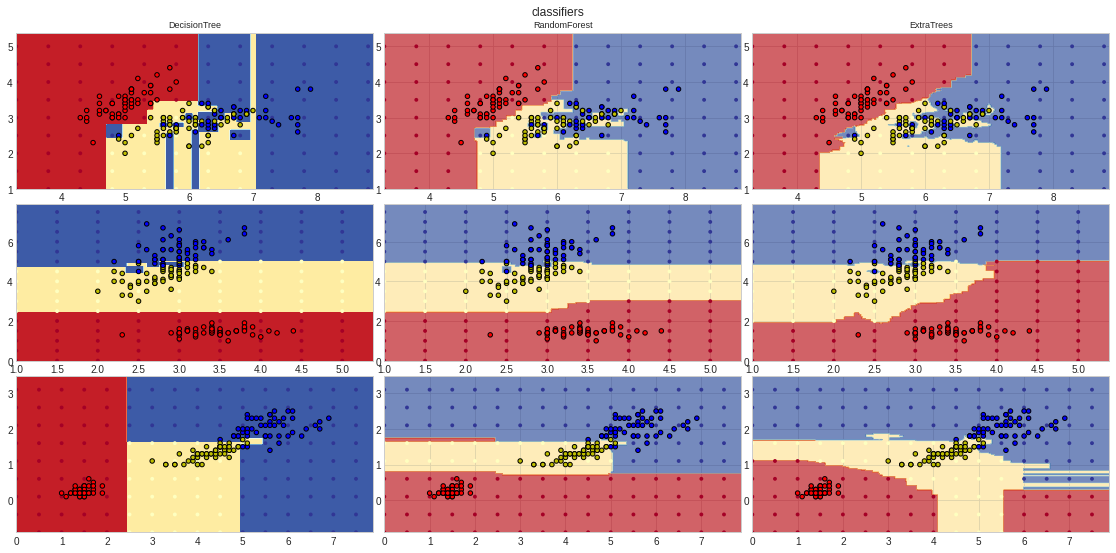

In [68]:
plt.figure(figsize=(16, 8))
plot_idx=1
for pair in ([0, 1], [1, 2], [2, 3]):
    
    for model in models:
        
        X = iris.data[:, pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        
        X = X[idx]
        y = y[idx]
        
        model.fit(X, y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X[:, 0].min() -1,  X[:, 0].max() +1
        y_min, y_max = X[:, 1].min() -1,  X[:, 1].max() +1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                             np.arange(y_min, y_max, plot_step))
        
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
            
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)

                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap= cmap)
                
        
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), 
                                               yy_coarser.ravel()]).reshape(xx_coarser.shape)
        
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, 
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors='none')
        
        plt.scatter(X[:, 0], X[:, 1], c=y, 
                    cmap=ListedColormap(['r', 'y','b']),
                    edgecolor='k', s=20)
        
        plot_idx += 1
        
plt.suptitle("classifiers", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [69]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

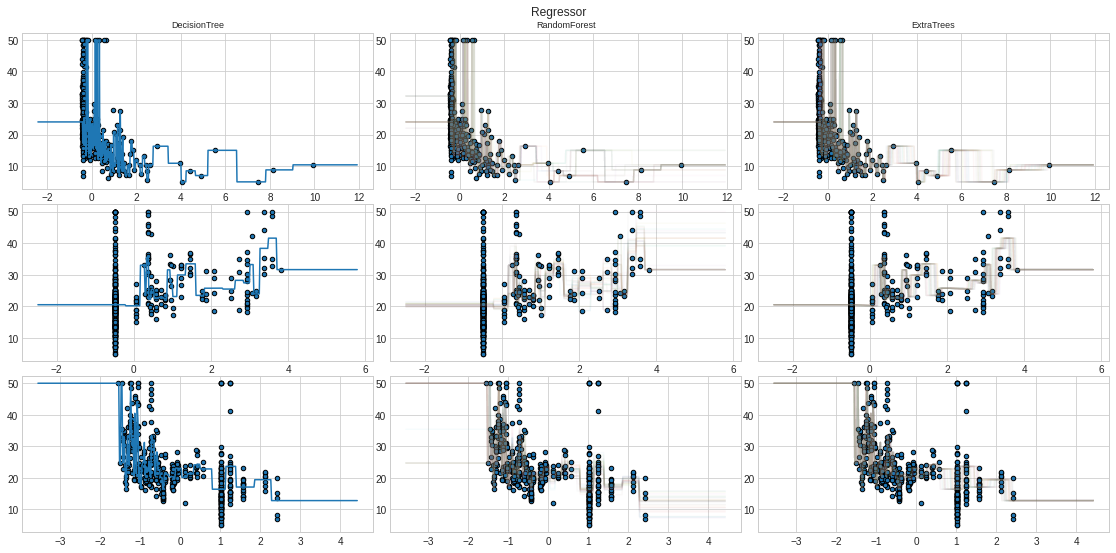

In [70]:
plt.figure(figsize=(16, 8))

for pair in (0, 1, 2):

    for model in models:

        X = boston.data[:,pair]
        y = boston.target

        idx=np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)

        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X-mean) / std

        model.fit(X.reshape(-1, 1), y)

        model_title=str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X.min()-1, X.max() +1
        y_min, y_max = y.min()-1, y.max() +1
        xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)

        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1, 1))
            cs = plt.plot(xx, Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1, 1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)

        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx += 1

plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [72]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [73]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08379325866699219(+/- 0.022821588101991738)
avg score time: 0.00697016716003418(+/- 0.0008175216841852685)
avg test time: 0.9466666666666667(+/- 0.03399346342395189)


In [74]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08434910774230957(+/- 0.004333866506619851)
avg score time: 0.00823988914489746(+/- 0.0021337827353365255)
avg test time: 0.8085714285714285(+/- 0.16822356718459935)


In [75]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.17116365432739258(+/- 0.006398101879577015)
avg score time: 0.008362817764282226(+/- 0.0006307533077490576)
avg test time: 0.9701133364384411(+/- 0.019709915473893072)


### AdaBoost 회귀

In [76]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [77]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10275464057922364(+/- 0.006025302384453137)
avg score time: 0.004310321807861328(+/- 0.00024461167126023223)
avg test time: 0.5985744583807469(+/- 0.20937548598257683)


In [78]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09799747467041016(+/- 0.015189254401484808)
avg score time: 0.005068159103393555(+/- 0.0012844942558994908)
avg test time: 0.41312084500745616(+/- 0.04091835944493939)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

### Gradient Tree Boosting 분류

In [80]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [81]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2097745418548584(+/- 0.01565368981234834)
avg score time: 0.0011463642120361328(+/- 0.00021194306184926592)
avg test time: 0.96(+/- 0.024944382578492935)


In [82]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.25756106376647947(+/- 0.012683154007683817)
avg score time: 0.001033782958984375(+/- 2.3337269865799937e-05)
avg test time: 0.9330158730158731(+/- 0.04127777701479872)


In [83]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.44942874908447267(+/- 0.0061594027063191625)
avg score time: 0.0011008739471435546(+/- 0.00013841988901982358)
avg test time: 0.9596180717279925(+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

In [84]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [85]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12973427772521973(+/- 0.01012932698158114)
avg score time: 0.0011946201324462891(+/- 0.00023074103278695785)
avg test time: 0.6752372690883461(+/- 0.16121836382662494)


In [86]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10800638198852539(+/- 0.0042375212322272905)
avg score time: 0.0012122154235839843(+/- 0.00017873002944795408)
avg test time: 0.4029450867301339(+/- 0.0688801507855847)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [87]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [88]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting='hard'
)

In [89]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split(".")[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' %(scores.mean(), scores.std(), model_name) )

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [90]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting='soft',
    weights=[2, 1, 2]
)

In [91]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split(".")[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' %(scores.mean(), scores.std(), model_name) )

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [93]:
X = iris.data[:, [0,2]]
y = iris.target

In [94]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)

vote_model = VotingClassifier(estimators=[('dt', model1), ('knn',model2), ('svc', model3)], 
                                          voting='soft',weights=[2, 1, 2])
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [95]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

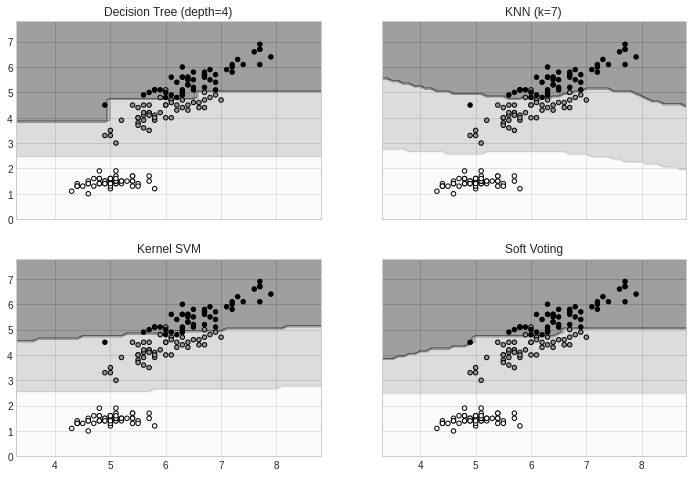

In [96]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)', 'Kernel SVM', 'Soft Voting']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:,1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [98]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()

vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]
)

In [99]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, boston.data, boston.target, cv=5)
    print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.67 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.63 (+/- 0.21) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [100]:
X = boston.data[:,0].reshape(-1, 1)
y = boston.target

In [101]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()

vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [102]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

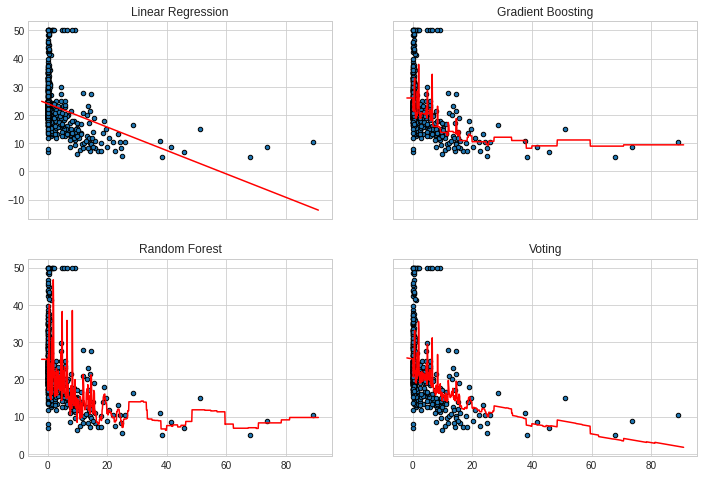

In [103]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression','Gradient Boosting', 'Random Forest','Voting']):
    Z = model.predict(xx.reshape(-1, 1))

    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [104]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [105]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [106]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [107]:
cross_val = cross_validate(
    estimator=reg,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15865826606750488(+/- 0.007265397762901313)
avg score time: 0.0031264781951904296(+/- 0.00015880521604186678)
avg test time: 0.3193125598078287(+/- 0.3328757426063098)


#### 회귀식 시각화

In [108]:
X = boston.data[:,0].reshape(-1, 1)
y = boston.target

In [109]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()

reg = StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor() )


model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

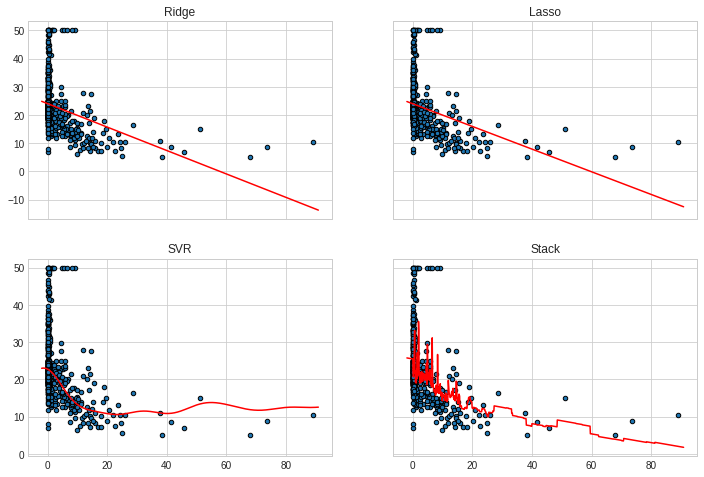

In [110]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge','Lasso', 'SVR','Stack']):
    Z = model.predict(xx.reshape(-1, 1))

    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [112]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
               ('svc', SVC()),
               ('naive', GaussianNB())]

In [113]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

In [114]:
cross_val = cross_validate(
    estimator=clf,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {}(+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {}(+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test time: {}(+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.35081934928894043(+/- 0.026736376795129427)
avg score time: 0.009665441513061524(+/- 0.000582804946548698)
avg test time: 0.96(+/- 0.024944382578492935)


#### 결정 경계 시각화

In [115]:
X = iris.data[:, [0,2]]
y = iris.target

In [116]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [117]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

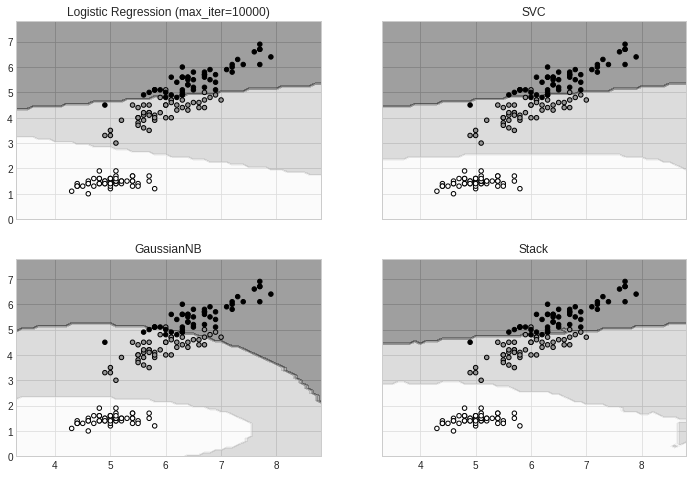

In [118]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression (max_iter=10000)', 'SVC', 'GaussianNB', 'Stack']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:,1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()